In [6]:
!pip install mean_average_precision

In [7]:
!git clone https://github.com/facebookresearch/detectron2.git --branch v0.1.1 detectron2_v0.1.1

fatal: destination path 'detectron2_v0.1.1' already exists and is not an empty directory.


In [8]:
%cd detectron2_v0.1.1

/content/detectron2_v0.1.1


In [9]:
!git checkout db1614e

HEAD is now at db1614e Supported different input channel size for retinanet.


In [10]:
!pip install -e .

Obtaining file:///content/detectron2_v0.1.1
  Found existing installation: detectron2 0.1.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [11]:
!unzip /content/CSE512_Spring21_HW4

Archive:  /content/CSE512_Spring21_HW4.zip
replace CSE512_Spring21_HW4/HW4_q2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CSE512_Spring21_HW4/HW4_q2.zip  
replace CSE512_Spring21_HW4/HW4_q3.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CSE512_Spring21_HW4/HW4_q3.zip  
replace CSE512_Spring21_HW4/CSE512_Spring21_HW4.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CSE512_Spring21_HW4/CSE512_Spring21_HW4.pdf  


In [12]:
%cd CSE512_Spring21_HW4/

/content/detectron2_v0.1.1/CSE512_Spring21_HW4


In [13]:
!unzip HW4_q3.zip

Streaming output truncated to the last 5000 lines.
  inflating: HW4_q3/Annotations/train_3876_festival_00229.xml  
  inflating: HW4_q3/Annotations/train_3884_festival_00556.xml  
  inflating: HW4_q3/Annotations/train_3888_festival_00715.xml  
  inflating: HW4_q3/Annotations/train_3900_festival_00979.xml  
  inflating: HW4_q3/Annotations/train_3906_festival_01225.xml  
  inflating: HW4_q3/Annotations/train_3912_festival_01382.xml  
  inflating: HW4_q3/Annotations/train_3922_friends_00106.xml  
  inflating: HW4_q3/Annotations/train_3922_friends_00108.xml  
  inflating: HW4_q3/Annotations/train_3928_friends_00211.xml  
  inflating: HW4_q3/Annotations/train_3931_friends_00269.xml  
  inflating: HW4_q3/Annotations/train_3932_friends_00302.xml  
  inflating: HW4_q3/Annotations/train_3934_friends_00333.xml  
  inflating: HW4_q3/Annotations/train_3935_friends_00345.xml  
  inflating: HW4_q3/Annotations/train_3939_friends_00415.xml  
  inflating: HW4_q3/Annotations/train_3939_friends_00417.xml 

In [14]:
%cd HW4_q3


/content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3


In [15]:
!wget https://public.vinai.io/ContactHands.zip


--2021-04-13 19:42:30--  https://public.vinai.io/ContactHands.zip
Resolving public.vinai.io (public.vinai.io)... 52.84.162.36, 52.84.162.17, 52.84.162.15, ...
Connecting to public.vinai.io (public.vinai.io)|52.84.162.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4865573845 (4.5G) [application/zip]
Saving to: ‘ContactHands.zip.1’

ContactHands.zip.1  100%[===================>]   4.53G  28.4MB/s    in 93s     

2021-04-13 19:44:04 (49.7 MB/s) - ‘ContactHands.zip.1’ saved [4865573845/4865573845]



In [11]:
!unzip ContactHands


Streaming output truncated to the last 5000 lines.
  inflating: ContactHands/JPEGImages/train_2607_000000464736.jpg  
  inflating: ContactHands/JPEGImages/train_0721_000000045492.jpg  
  inflating: ContactHands/JPEGImages/test_4698_6.jpg  
  inflating: ContactHands/JPEGImages/train_3187_Buffy_167.jpg  
  inflating: ContactHands/JPEGImages/train_3678_athletics_00224.jpg  
  inflating: ContactHands/JPEGImages/train_1420_000000187785.jpg  
  inflating: ContactHands/JPEGImages/train_2173_000000364154.jpg  
  inflating: ContactHands/JPEGImages/train_0501_000000009429.jpg  
  inflating: ContactHands/JPEGImages/train_1119_000000118181.jpg  
  inflating: ContactHands/JPEGImages/train_0385_064393_004.jpg  
  inflating: ContactHands/JPEGImages/train_1875_000000296459.jpg  
  inflating: ContactHands/JPEGImages/train_0159_029167_004.jpg  
  inflating: ContactHands/JPEGImages/train_3195_Buffy_236.jpg  
  inflating: ContactHands/JPEGImages/train_3294_Poselet_129.jpg  
  inflating: ContactHands/JPEGI

In [16]:
cp -a /content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/sets/. /content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/ContactHands/ImageSets/Main


In [17]:
!rsync -a --delete /content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/Annotations/ /content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/ContactHands/Annotations

In [18]:
%cd /content/detectron2_v0.1.1/

/content/detectron2_v0.1.1


In [19]:
import detectron2
detectron2.__version__


'0.1.1'

In [20]:
%cd /content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/

/content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3


In [21]:
import hw4_utils as hw
feat_extractor =  hw.prepare_second_stream()
D_t, lb_t = hw.get_pos_and_random_neg(feat_extractor,dataset= 'train')

100%|██████████| 5000/5000 [06:00<00:00, 13.88it/s]


In [22]:
from sklearn.svm import LinearSVC
clf = LinearSVC (max_iter = 1000, verbose = True)
clf.fit(D_t,lb_t)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=True)

In [23]:
D_val, lb_val = hw.get_pos_and_random_neg(feat_extractor,dataset= 'validation')

100%|██████████| 1000/1000 [00:45<00:00, 22.03it/s]


In [24]:
clf.score(D_val, lb_val)

0.7196844382236925

In [25]:
hw.generate_result_file(feat_extractor,clf,dataset='validation', out_file= 'result.npy')

100%|██████████| 1000/1000 [12:48<00:00,  1.30it/s]

Results have been saved to result.npy


In [26]:
ap =hw.compute_mAP(result_file= 'result.npy',dataset='validation')

  2%|▏         | 23/1000 [00:00<00:04, 222.71it/s]

Loading annotations and predictions


100%|██████████| 1000/1000 [00:41<00:00, 24.31it/s]


mAP: 6.695950287394226e-05


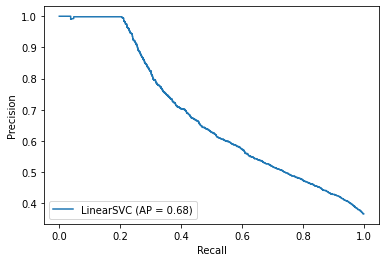

In [27]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
plot_precision_recall_curve(clf,D_val,lb_val)

In [ ]:
%pwd

In [28]:
import detect as det

In [29]:
import random
import tqdm
import os
import cv2

In [30]:
def hard_neg (feat_extractor,clf, n = 10000):
  
  maxe = n
  hard = np.zeros((0,1024), np.float64)
  
  ann_pool = "/content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/ContactHands/Annotations/"
  img_pool = "/content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/ContactHands/JPEGImages/"
  
  dataset_file = "/content/detectron2_v0.1.1/CSE512_Spring21_HW4/HW4_q3/ContactHands/ImageSets/Main/validation.txt"
  with open(dataset_file, "r") as f:
    dataset = f.read().splitlines()

  random.shuffle(dataset)

  for ann in dataset :
    xml_path = os.path.join(ann_pool, ann + ".xml")
    image_file, b_annoted = hw.read_content(xml_path)
    image_path = os.path.join(img_pool, image_file)
    
    if image_file.split(".jpg")[0] in dataset:
      img = cv2.imread(image_path)
      img, boxes = hw.resize_im_boxes(img, b_annoted, 256, 256)

      boxes_pred = hw.detect(img,feat_extractor,clf)
      boxes_pred = boxes_pred[:50 if len (boxes_pred) >= 50 else len (boxes_pred), :-1]

      ious = np.empty(len (boxes_pred),)
      for box in b_annoted :
        ious = np.maximum(ious, hw.get_iou(box, boxes_pred))
      
      boxes_pred = boxes_pred[ious <= 0.3]
        
      det.inference_second_stream(feat_extractor,img)
      feats = feat_extractor.extract_features(boxes_pred)
      feats = feats.detach().to('cpu').numpy()

      hard = np.append(hard,feats,axis = 0)
      maxe = maxe - len(feats)

      if maxe <= 0:
        return hard

  return hard


In [31]:
import numpy as np
import tqdm
from sklearn.metrics import average_precision_score

In [32]:
clf = LinearSVC (max_iter = 1000, verbose = True)

obj_itr = []
d_p = D_t[lb_t == 1]
a_p = []
d_n = D_t[lb_t == -1]


for itr in range (10) :
  lb = np.concatenate((np.ones(len(d_p)),-np.ones(len(d_n))))

  D =  np.concatenate((d_p,d_n), axis = 0)
  index = np.random.permutation(D.shape[0])
  D_in = D[index]
  lb_in = lb[index]


  clf.fit(D_in, lb_in)
  w = clf.coef_
  b = clf.intercept_

  s_v = np.empty((0,1024), np.float64)

  for x in d_n:
    if -1*(np.dot(w,x) + b) < 1 :
      s_v = np.append(s_v, np.atleast_2d(x), axis = 0)

  d_n = s_v
  obj = np.linalg.norm(w)**2
  
  score = clf.decision_function(D_val)
  ap = average_precision_score(lb_val, score)

  obj_itr = obj_itr.append(obj)
  a_p = a_p.append(ap)

  hard_examples = hard_neg (feat_extractor,clf)
  d_n = np.append(d_negative, hard_examples, axis = 0)



----
Iter :  0
Traing Svm
Positive Examples : 13854
Negative Examples : 25000
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 20786
----
Iter :  1
Traing Svm
Positive Examples : 13854
Negative Examples : 14295
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 2927
----
Iter :  2
Traing Svm
Positive Examples : 13854
Negative Examples : 21460
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 1378
----
Iter :  3
Traing Svm
Positive Examples : 13854
Negative Examples : 30177
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 11435
----
Iter :  4
Traing Svm
Positive Examples : 13854
Negative Examples : 28838
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 26796
----
Iter :  5
Traing Svm
Positive Examples : 13854
Negative Examples : 12132
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 9232
----
Iter :  6
Traing Svm
Positive Examples : 13854
Negative Examples : 12996
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 5918
----
Iter :  7
Traing Svm
Positive Examples : 13854
Negative Examples : 17159
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 610
----
Iter :  8
Traing Svm
Positive Examples : 13854
Negative Examples : 26646
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 3
----
Iter :  9
Traing Svm
Positive Examples : 13854
Negative Examples : 36741
[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training SVM complete
NSV removed : 4076
Objective :  [0.20073592 0.1961869  0.19754075 0.19517744 0.19214153 0.19554298
 0.19213783 0.19313292 0.19247874 0.19123771]
Average Precision :  [0.67794486 0.40120352 0.45223088 0.64249706 0.57081924 0.44464972
 0.5360358  0.48870624 0.48647239 0.58637103]


In [ ]:
print ("Objective : ",obj_itr)
print ("Average Precision : ",a_p)

In [33]:
hw.generate_result_file(feat_extractor,clf,dataset='test', out_file= '113260061.npy')

100%|██████████| 1629/1629 [24:10<00:00,  1.12it/s]

Results have been saved to 113260061.npy


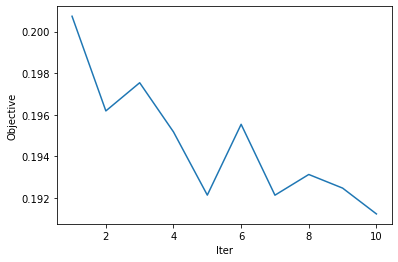

In [36]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot (x, obj_itr)
plt.xlabel ("Iter")
plt.ylabel ("Objective")
plt.show()

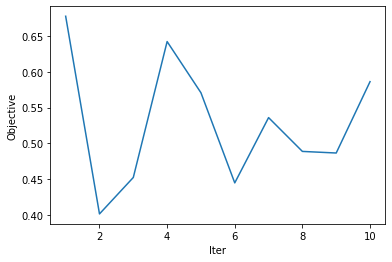

In [37]:
plt.plot (x, ap_array)
plt.xlabel ("Iter")
plt.ylabel ("Objective")
plt.show()